# TP Apprentissage supervisé - Partie 1

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
feat_raw = pd.read_csv('acsincome_ca_features.csv')
label_raw = pd.read_csv('acsincome_ca_labels.csv', usecols=['PINCP'])[['PINCP']]

In [10]:
feat_raw

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,30.0,6.0,14.0,1.0,9610.0,6.0,16.0,40.0,1.0,8.0
1,21.0,4.0,16.0,5.0,1970.0,6.0,17.0,20.0,1.0,1.0
2,65.0,2.0,22.0,5.0,2040.0,6.0,17.0,8.0,1.0,1.0
3,33.0,1.0,14.0,3.0,9610.0,36.0,16.0,40.0,1.0,1.0
4,18.0,2.0,19.0,5.0,1021.0,6.0,17.0,18.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
195660,38.0,1.0,22.0,1.0,1021.0,210.0,0.0,40.0,1.0,6.0
195661,39.0,1.0,22.0,1.0,1021.0,210.0,1.0,40.0,2.0,6.0
195662,61.0,1.0,19.0,1.0,5240.0,17.0,0.0,45.0,1.0,1.0
195663,69.0,7.0,24.0,1.0,2040.0,207.0,0.0,45.0,1.0,6.0


In [11]:
label_raw

,PINCP
0,False
1,False
2,False
3,False
4,False
...,...
195660,True
195661,True
195662,True
195663,False


# Preprocessing

In [3]:
def preprocess(X_init, y_init, ratio=0.04):
    # We normalize the ages
    scaler = RobustScaler()
    age_scaled = scaler.fit_transform(X_init[["AGEP"]])
    X_init[["AGEP"]] = age_scaled
    
    # There is no NA value. good.
    
    X_all, y_all = shuffle(X_init, y_init)
    
    # only use the first N samples to limit training time
    num_samples = int(len(X_all)*ratio)
    X, y = X_all.head(num_samples), y_all.head(num_samples)
    
    
    return X, y

In [13]:
X, y = preprocess(feat_raw, label_raw)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [14]:
X_train

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
36859,-0.60,1.0,19.0,5.0,7200.0,6.0,4.0,40.0,1.0,8.0
157679,-0.32,1.0,16.0,1.0,9640.0,303.0,1.0,30.0,2.0,8.0
174422,0.36,7.0,23.0,5.0,3090.0,213.0,0.0,70.0,1.0,1.0
31389,-0.88,1.0,19.0,5.0,4700.0,6.0,2.0,40.0,2.0,9.0
67833,-0.04,1.0,18.0,1.0,6700.0,6.0,1.0,40.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
112337,0.52,3.0,16.0,1.0,4220.0,6.0,1.0,40.0,1.0,1.0
151611,0.28,1.0,8.0,1.0,4020.0,303.0,1.0,40.0,2.0,1.0
158865,0.28,1.0,19.0,1.0,4810.0,6.0,1.0,40.0,1.0,1.0
14642,-0.08,1.0,16.0,3.0,9620.0,6.0,4.0,30.0,1.0,1.0


# SVM

In [15]:
# SVM, RandomForest, AdaBoost et GradientBoosting
model = SVC()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.69728435 0.71086262 0.71884984 0.70686901 0.7100639 ]


In [16]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.71      0.84      0.77       904
        True       0.71      0.54      0.61       662

    accuracy                           0.71      1566
   macro avg       0.71      0.69      0.69      1566
weighted avg       0.71      0.71      0.71      1566

-----------------------------------
[[761 143]
 [306 356]]


In [17]:
params = {'kernel': ['poly', 'rbf', 'sigmoid'],
         'degree': [2,3],
         'C': np.logspace(-2.3, -1.3, 10)}

gsv = GridSearchCV(SVC(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'C': 0.0107977516232771, 'degree': 2, 'kernel': 'rbf'}
0.7124600638977635


In [18]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.71      0.85      0.77       904
        True       0.72      0.52      0.61       662

    accuracy                           0.71      1566
   macro avg       0.72      0.69      0.69      1566
weighted avg       0.71      0.71      0.70      1566

-----------------------------------
[[772 132]
 [317 345]]


# RandomForest

In [19]:
X, y = preprocess(feat_raw, label_raw, 0.01)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [20]:
model = RandomForestClassifier()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.77316294 0.79552716 0.81789137 0.7827476  0.76602564]


In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.84      0.86      0.85       231
        True       0.79      0.76      0.78       161

    accuracy                           0.82       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.82      0.82      0.82       392

-----------------------------------
[[198  33]
 [ 38 123]]


In [22]:
params = {'n_estimators': np.arange(50,150,10),
         'criterion': ['gini', 'log_loss', 'entropy'],
          'max_depth': ['None', 2,4,8,10],
         'min_samples_split': [2,3,4],
         'n_jobs':[-1]}

gsv = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 130, 'n_jobs': -1}
0.8043335790939624


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
 

In [23]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.85      0.86      0.85       231
        True       0.79      0.78      0.78       161

    accuracy                           0.82       392
   macro avg       0.82      0.82      0.82       392
weighted avg       0.82      0.82      0.82       392

-----------------------------------
[[198  33]
 [ 36 125]]


# Adaboost

In [24]:
X, y = preprocess(feat_raw, label_raw, 0.01)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [25]:
model = AdaBoostClassifier()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.76038339 0.81789137 0.78913738 0.80830671 0.75641026]


In [26]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.82      0.78      0.80       237
        True       0.69      0.74      0.71       155

    accuracy                           0.77       392
   macro avg       0.76      0.76      0.76       392
weighted avg       0.77      0.77      0.77       392

-----------------------------------
[[185  52]
 [ 40 115]]


In [27]:
params = {'n_estimators': np.arange(50,150,10),
         'learning_rate': np.logspace(-2.3, -1.3, 10),
          'algorithm': ['SAMME', 'SAMME.R']
         }

gsv = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.05011872336272722, 'n_estimators': 140}
0.789641189481445


In [28]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.80      0.84      0.82       237
        True       0.73      0.68      0.70       155

    accuracy                           0.78       392
   macro avg       0.77      0.76      0.76       392
weighted avg       0.77      0.78      0.77       392

-----------------------------------
[[199  38]
 [ 50 105]]


# GradientBoosting

In [29]:
X, y = preprocess(feat_raw, label_raw, 0.01)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

In [30]:
model = GradientBoostingClassifier()
cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(cv_results)

[0.79233227 0.80511182 0.79872204 0.76996805 0.80128205]


In [31]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.84      0.84      0.84       239
        True       0.75      0.75      0.75       153

    accuracy                           0.80       392
   macro avg       0.79      0.79      0.79       392
weighted avg       0.80      0.80      0.80       392

-----------------------------------
[[200  39]
 [ 39 114]]


In [32]:
params = {'loss': ['log_loss', 'exponential'],
         'learning_rate': np.logspace(-2.3, -1.3, 10),
          'n_estimators': np.arange(50,150,10),
         'criterion':['friedman_mse', 'squared_error']}

gsv = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5)
gsv.fit(X_train, y_train)

print(gsv.best_params_)
print(gsv.best_score_)

{'criterion': 'friedman_mse', 'learning_rate': 0.03880510732210184, 'loss': 'exponential', 'n_estimators': 130}
0.7954063242401901


In [33]:
model = gsv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-----------------------------------")
print(confusion_matrix(y_test, y_pred))
# [[TP, FN],
#  [FP, TN]]

              precision    recall  f1-score   support

       False       0.86      0.84      0.85       239
        True       0.76      0.78      0.77       153

    accuracy                           0.82       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.82      0.82      0.82       392

-----------------------------------
[[201  38]
 [ 34 119]]


# Collecting the best models

In [74]:
X, y = preprocess(feat_raw, label_raw, 0.04)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

best_GB = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.03880510732210184,
                                     loss='exponential', n_estimators=130)

best_AB = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.05011872336272722, n_estimators=140)

best_RF = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=2, n_estimators=130, n_jobs=-1)

best_SVM = SVC(C=0.0107977516232771, degree=2, kernel='rbf')
        
best_models = [best_GB, best_AB, best_RF, best_SVM]

for model in best_models:
    model.fit(X_train, y_train)   

In [48]:
# Go search the rest of the data
feat_ne = pd.read_csv('acsincome_ne_allfeaturesTP2.csv')
label_ne = pd.read_csv('acsincome_ne_labelTP2.csv', usecols=['PINCP'])[['PINCP']]


X_ne, y_ne = preprocess(feat_ne, label_ne)

for model in best_models:
    print("===================================")
    print(model)
    model.fit(X_train, y_train)   

    y_pred_ne = model.predict(X_ne)
    print(classification_report(y_ne, y_pred_ne))
    print("-----------------------------------")
    print(confusion_matrix(y_ne, y_pred_ne))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       294
           1       0.54      0.76      0.63       137

    accuracy                           0.72       431
   macro avg       0.70      0.73      0.70       431
weighted avg       0.76      0.72      0.73       431

-----------------------------------
[[205  89]
 [ 33 104]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       294
           1       0.56      0.68      0.61       137

    accuracy                           0.73       431
   macro avg       0.70      0.71      0.70       431
weighted avg       0.75      0.73      0.73       431

-----------------------------------
[[220  74]
 [ 44  93]]
RandomForestClassifier(criter

In [50]:
# Go search the rest of the data
feat_co = pd.read_csv('acsincome_co_allfeaturesTP2.csv')
label_co = pd.read_csv('acsincome_co_labelTP2.csv', usecols=['PINCP'])[['PINCP']]

X_co, y_co = preprocess(feat_co, label_co)

for model in best_models:
    print("===================================")
    print(model)
    model.fit(X_train, y_train)   

    y_pred_co = model.predict(X_co)
    print(classification_report(y_co, y_pred_co))
    print("-----------------------------------")
    print(confusion_matrix(y_co, y_pred_co))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       719
           1       0.72      0.82      0.77       533

    accuracy                           0.79      1252
   macro avg       0.79      0.79      0.79      1252
weighted avg       0.80      0.79      0.79      1252

-----------------------------------
[[551 168]
 [ 95 438]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       719
           1       0.73      0.76      0.74       533

    accuracy                           0.78      1252
   macro avg       0.77      0.77      0.77      1252
weighted avg       0.78      0.78      0.78      1252

-----------------------------------
[[567 152]
 [129 404]]
RandomForestClassifier(criter

In [67]:
X, y = preprocess(feat_raw, label_raw, 0.04)
X['target'] = y

X.corr()[['target']]

,target
AGEP,0.253918
COW,0.051095
SCHL,0.357686
MAR,-0.249854
OCCP,-0.342126
POBP,-0.096035
RELP,-0.225071
WKHP,0.338617
SEX,-0.123547
RAC1P,-0.095033


In [83]:
X_test_corr = X_test.copy()

y_pred_GB = best_GB.predict(X_test)
y_pred_RF = best_RF.predict(X_test)
y_pred_SVM = best_SVM.predict(X_test)
y_pred_AB = best_AB.predict(X_test)

X_test_corr['pred_gb'] = y_pred_GB
X_test_corr['pred_rf'] = y_pred_RF
X_test_corr['pred_svm'] = y_pred_SVM
X_test_corr['pred_ab'] = y_pred_AB
X_test_corr['target'] = y_test

X_test_corr.corr()[['pred_gb', 'pred_rf', 'pred_svm', 'pred_ab', 'target']]

,pred_gb,pred_rf,pred_svm,pred_ab,target
AGEP,0.248065,0.245363,0.089803,0.181025,0.296774
COW,0.098516,0.073678,0.060285,0.103735,0.092468
SCHL,0.451920,0.445859,0.329616,0.457014,0.352467
MAR,-0.324116,-0.311037,-0.158618,-0.266111,-0.275053
OCCP,-0.473127,-0.470121,-0.757288,-0.514902,-0.341937
POBP,-0.148944,-0.156099,-0.088740,-0.130747,-0.115937
RELP,-0.281573,-0.249032,-0.107230,-0.250024,-0.207905
WKHP,0.450587,0.442483,0.167823,0.462483,0.333439
SEX,-0.122195,-0.131393,-0.013668,-0.073401,-0.133252
RAC1P,-0.139578,-0.150601,-0.076532,-0.118626,-0.151304


In [98]:
from sklearn.inspection import permutation_importance

FIRF = permutation_importance(best_RF, X_train, y_train, n_repeats=10)
FIGB = permutation_importance(best_GB, X_train, y_train, n_repeats=10)
FISVM = permutation_importance(best_SVM, X_train, y_train, n_repeats=10)
FIAB = permutation_importance(best_AB, X_train, y_train, n_repeats=10)

In [97]:
print("RandomForest\n",FIRF.importances_mean, "\n\n")
print("GradientBoosting\n",FIGB.importances_mean, "\n\n")
print("SVM\n",FISVM.importances_mean, "\n\n")
print("AdaBoost\n",FIAB.importances_mean, "\n\n")



RandomForest
 [0.06610224 0.01400958 0.07880192 0.01749201 0.08041534 0.02923323
 0.04846645 0.1207508  0.01875399 0.01209265] 


GradientBoosting
 [0.02587859 0.00188498 0.04892971 0.00268371 0.03766773 0.00726837
 0.0207508  0.0907508  0.00669329 0.00111821] 


SVM
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.80287540e-01 -1.59744409e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00] 


AdaBoost
 [0.01819489 0.         0.0471246  0.         0.03236422 0.00138978
 0.0165655  0.07785942 0.00153355 0.        ] 




# SENSITIVE DATA - SEX

In [102]:
datamix = X_test.copy()
datamix['label'] = y_test

X_test_sex_M = datamix.loc[datamix.SEX == 1.0].drop(columns='label')
X_test_sex_F = datamix.loc[datamix.SEX == 2.0].drop(columns='label')

y_test_sex_M = datamix.loc[datamix.SEX == 1.0].label
y_test_sex_F = datamix.loc[datamix.SEX == 2.0].label

In [103]:
y_pred_GB_M = best_GB.predict(X_test_sex_M)
y_pred_RF_M = best_RF.predict(X_test_sex_M)
y_pred_SVM_M = best_SVM.predict(X_test_sex_M)
y_pred_AB_M = best_AB.predict(X_test_sex_M)

y_pred_GB_F = best_GB.predict(X_test_sex_F)
y_pred_RF_F = best_RF.predict(X_test_sex_F)
y_pred_SVM_F = best_SVM.predict(X_test_sex_F)
y_pred_AB_F = best_AB.predict(X_test_sex_F)

In [112]:
print("\nGB (M - F)")
print(classification_report(y_test_sex_M, y_pred_GB_M))
print(classification_report(y_test_sex_F, y_pred_GB_F))

print("\nAB (M - F)")
print(classification_report(y_test_sex_M, y_pred_AB_M))
print(classification_report(y_test_sex_F, y_pred_AB_F))

print("\nSVM (M - F)")
print(classification_report(y_test_sex_M, y_pred_SVM_M))
print(classification_report(y_test_sex_F, y_pred_SVM_F))

print("\nRF (M - F)")
print(classification_report(y_test_sex_M, y_pred_RF_M))
print(classification_report(y_test_sex_F, y_pred_RF_F))


GB (M - F)
              precision    recall  f1-score   support

       False       0.79      0.83      0.81       413
        True       0.79      0.76      0.78       367

    accuracy                           0.79       780
   macro avg       0.79      0.79      0.79       780
weighted avg       0.79      0.79      0.79       780

              precision    recall  f1-score   support

       False       0.85      0.86      0.86       519
        True       0.73      0.71      0.72       267

    accuracy                           0.81       786
   macro avg       0.79      0.79      0.79       786
weighted avg       0.81      0.81      0.81       786


AB (M - F)
              precision    recall  f1-score   support

       False       0.75      0.85      0.80       413
        True       0.81      0.68      0.73       367

    accuracy                           0.77       780
   macro avg       0.78      0.77      0.77       780
weighted avg       0.77      0.77      0.77       

In [115]:
 # acsincome_ca_features_without_sex
# Go search the rest of the data
feat_without_sex = pd.read_csv('acsincome_ca_features_without_sex.csv')
X_WS, y_WS = preprocess(feat_without_sex, label_raw)

X_WS_train, X_WS_test, y_WS_train, y_WS_test = train_test_split(X_WS, y_WS, test_size=0.2)
y_WS_train = y_WS_train.to_numpy().reshape(1,-1)[0]

for model in best_models:
    model.fit(X_WS_train, y_WS_train)

In [117]:
for model in best_models:
    print("===================================")
    print(model)
    y_pred = model.predict(X_WS_test)
    print(classification_report(y_WS_test, y_pred))
    print("-----------------------------------")
    print(confusion_matrix(y_WS_test, y_pred))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

       False       0.83      0.82      0.82       938
        True       0.73      0.74      0.74       628

    accuracy                           0.79      1566
   macro avg       0.78      0.78      0.78      1566
weighted avg       0.79      0.79      0.79      1566

-----------------------------------
[[766 172]
 [161 467]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

       False       0.80      0.84      0.82       938
        True       0.75      0.69      0.72       628

    accuracy                           0.78      1566
   macro avg       0.78      0.77      0.77      1566
weighted avg       0.78      0.78      0.78      1566

-----------------------------------
[[792 146]
 [192 436]]
RandomForestClassifier(criter

Valeurs d’équité statistique - pas beaucoup de variation, 1% max ! c'est ok.

# SENSITIVE DATA - RAC1P

In [4]:
X, y = preprocess(feat_raw, label_raw)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.to_numpy().reshape(1,-1)[0]

(array([3.934e+03, 2.540e+02, 4.300e+01, 1.000e+00, 0.000e+00, 1.500e+01,
        1.015e+03, 1.700e+01, 7.390e+02, 2.420e+02]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

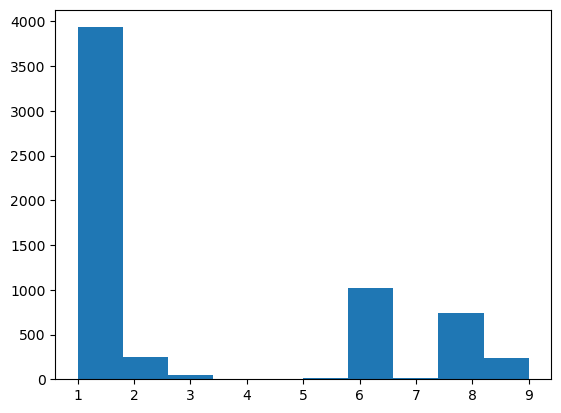

In [14]:
plt.hist(X_train['RAC1P'])


In [15]:
datamix = X_test.copy()
datamix['label'] = y_test

X_test_race_cau = datamix.loc[datamix.RAC1P == 1.0].drop(columns='label')
X_test_race_other = datamix.loc[datamix.RAC1P != 1.0].drop(columns='label')

y_test_race_cau = datamix.loc[datamix.RAC1P == 1.0].label
y_test_race_other = datamix.loc[datamix.RAC1P != 1.0].label

In [17]:
best_GB = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.03880510732210184,
                                     loss='exponential', n_estimators=130)

best_AB = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.05011872336272722, n_estimators=140)

best_RF = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=2, n_estimators=130, n_jobs=-1)

best_SVM = SVC(C=0.0107977516232771, degree=2, kernel='rbf')
        
best_models = [best_GB, best_AB, best_RF, best_SVM]

for model in best_models:
    model.fit(X_train, y_train)  

In [19]:
y_pred_GB_cau = best_GB.predict(X_test_race_cau)
y_pred_RF_cau = best_RF.predict(X_test_race_cau)
y_pred_SVM_cau = best_SVM.predict(X_test_race_cau)
y_pred_AB_cau = best_AB.predict(X_test_race_cau)

y_pred_GB_other = best_GB.predict(X_test_race_other)
y_pred_RF_other = best_RF.predict(X_test_race_other)
y_pred_SVM_other = best_SVM.predict(X_test_race_other)
y_pred_AB_other = best_AB.predict(X_test_race_other)

In [21]:
print("\nGB (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_GB_cau))
print(classification_report(y_test_race_other, y_pred_GB_other))

print("\nAB (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_AB_cau))
print(classification_report(y_test_race_other, y_pred_AB_other))

print("\nSVM (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_SVM_cau))
print(classification_report(y_test_race_other, y_pred_SVM_other))

print("\nRF (caucasian - other)")
print(classification_report(y_test_race_cau, y_pred_RF_cau))
print(classification_report(y_test_race_other, y_pred_RF_other))


GB (caucasian - other)
              precision    recall  f1-score   support

       False       0.84      0.84      0.84       550
        True       0.79      0.79      0.79       415

    accuracy                           0.82       965
   macro avg       0.81      0.81      0.81       965
weighted avg       0.82      0.82      0.82       965

              precision    recall  f1-score   support

       False       0.84      0.86      0.85       377
        True       0.76      0.71      0.74       224

    accuracy                           0.81       601
   macro avg       0.80      0.79      0.79       601
weighted avg       0.81      0.81      0.81       601


AB (caucasian - other)
              precision    recall  f1-score   support

       False       0.80      0.86      0.83       550
        True       0.79      0.71      0.75       415

    accuracy                           0.79       965
   macro avg       0.79      0.78      0.79       965
weighted avg       0.79   

In [120]:
# Go search the rest of the data (without race) and test
feat_without_race = pd.read_csv('acsincome_ca_features_without_race.csv')
X_WR, y_WR = preprocess(feat_without_race, label_raw)

X_WR_train, X_WR_test, y_WR_train, y_WR_test = train_test_split(X_WR, y_WR, test_size=0.2)
y_WR_train = y_WR_train.to_numpy().reshape(1,-1)[0]

for model in best_models:
    model.fit(X_WR_train, y_WR_train)

In [122]:
for model in best_models:
    print("===================================")
    print(model)
    y_pred = model.predict(X_WR_test)
    print(classification_report(y_WR_test, y_pred))
    print("-----------------------------------")
    print(confusion_matrix(y_WR_test, y_pred))

GradientBoostingClassifier(learning_rate=0.03880510732210184,
                           loss='exponential', n_estimators=130)
              precision    recall  f1-score   support

       False       0.83      0.81      0.82       938
        True       0.73      0.75      0.74       628

    accuracy                           0.79      1566
   macro avg       0.78      0.78      0.78      1566
weighted avg       0.79      0.79      0.79      1566

-----------------------------------
[[764 174]
 [159 469]]
AdaBoostClassifier(learning_rate=0.05011872336272722, n_estimators=140)
              precision    recall  f1-score   support

       False       0.81      0.84      0.82       938
        True       0.75      0.70      0.72       628

    accuracy                           0.78      1566
   macro avg       0.78      0.77      0.77      1566
weighted avg       0.78      0.78      0.78      1566

-----------------------------------
[[791 147]
 [190 438]]
RandomForestClassifier(criter